<h1>Spearman Rank Correlation Procedure on Movie Genre Data</h1>

In [12]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
%matplotlib inline

print ("imported successfully")

imported successfully


In [13]:
monthly_genre_df = pd.read_csv('monthly_genres.csv')  
monthly_genre_df

,Year,Month,CCI,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Music,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2000,January,103.06200,0.42650,0.53799,0.52979,0.48252,0.54099,0.53095,0.28723,...,0.55745,0.61170,0.0,0.55851,0.68972,0.34574,0.56206,0.54551,0.36170,0.25532
1,2000,February,103.12180,0.36067,0.57337,0.57609,0.54447,0.51230,0.56366,0.31833,...,0.60326,0.61956,0.0,0.53133,0.55254,0.38044,0.55652,0.56196,0.09239,0.00000
2,2000,March,103.03030,0.51782,0.68218,0.64158,0.50135,0.55504,0.52255,0.39164,...,0.47030,0.54868,0.0,0.51850,0.65941,0.51287,0.42150,0.48548,0.25743,0.00000
3,2000,April,103.00940,0.48438,0.55332,0.68077,0.39511,0.53526,0.53450,0.28269,...,0.55289,0.58333,0.0,0.50592,0.60165,0.41667,0.44231,0.51740,0.97596,0.00000
4,2000,May,102.98080,0.72959,0.65578,0.59592,0.36508,0.48792,0.54239,0.34354,...,0.32823,0.43240,0.0,0.52708,0.58163,0.52041,0.51633,0.58043,0.89286,0.91837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020,August,98.52761,0.71528,0.76190,0.76042,0.28472,0.64757,0.52679,0.17708,...,0.55208,0.55209,0.0,0.51389,0.72619,0.00000,0.02083,0.52546,0.42361,0.00000
248,2020,September,98.88483,0.77111,0.79792,0.80000,0.31667,0.55333,0.53095,0.23889,...,0.35417,0.43333,0.0,0.46945,0.73095,0.00000,0.45000,0.55000,0.36111,0.00000
249,2020,October,99.06890,0.67229,0.62490,0.69478,0.28916,0.53263,0.57430,0.28313,...,0.49398,0.50843,0.0,0.52410,0.73012,0.00000,0.30120,0.52754,0.53012,0.00000
250,2020,November,99.04055,0.60830,0.55779,0.61390,0.39765,0.55772,0.57941,0.28706,...,0.26353,0.50000,0.0,0.41569,0.62647,0.00000,0.47059,0.57149,0.25882,0.00000


In [14]:
yearly_genre_df = pd.read_csv('yearly_genres.csv')  
yearly_genre_df

,Year,AVG_CCI,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2000,102.758225,0.57279,0.68919,0.67870,0.51716,0.53965,0.51901,0.38750,0.46346,...,0.48747,0.59600,0.00000,0.48139,0.72404,0.56701,0.58439,0.56272,0.41787,0.44704
1,2001,100.359427,0.66152,0.69460,0.56878,0.38499,0.53490,0.61576,0.26937,0.44513,...,0.48063,0.53426,0.00000,0.47725,0.62405,0.48534,0.53805,0.59148,0.40652,0.44310
2,2002,100.349843,0.71469,0.76687,0.73750,0.41754,0.53866,0.51806,0.33497,0.47492,...,0.37635,0.62076,0.00000,0.49212,0.72735,0.58868,0.59815,0.58006,0.47188,0.93860
3,2003,100.171237,0.70049,0.68340,0.66429,0.52344,0.55445,0.56720,0.33042,0.46726,...,0.44618,0.58024,0.00000,0.49753,0.66853,0.55813,0.55854,0.62095,0.48912,0.58996
4,2004,101.098033,0.67842,0.68211,0.65671,0.58218,0.56164,0.53809,0.38022,0.47294,...,0.56836,0.61772,0.30143,0.54401,0.63490,0.59472,0.70532,0.57250,0.50029,0.58143
5,2005,100.241965,0.67820,0.72708,0.67571,0.55431,0.53633,0.59915,0.34593,0.48061,...,0.54373,0.58574,0.70858,0.51514,0.71219,0.60811,0.66546,0.60113,0.38909,0.41982
6,2006,100.092184,0.71759,0.77164,0.68282,0.55658,0.56573,0.57339,0.33841,0.48050,...,0.51671,0.57252,0.85121,0.52171,0.59621,0.54352,0.69781,0.61190,0.47231,0.58395
7,2007,99.849687,0.70777,0.72292,0.69646,0.59092,0.52388,0.56242,0.31934,0.49605,...,0.48619,0.58847,0.00000,0.52860,0.69685,0.65795,0.62224,0.62626,0.57820,0.60903
8,2008,96.897165,0.67509,0.73826,0.65927,0.48860,0.57366,0.52642,0.36039,0.48585,...,0.47498,0.54391,0.54069,0.54697,0.70283,0.62262,0.54147,0.55627,0.53024,0.44985
9,2009,97.255607,0.68903,0.68877,0.70554,0.59532,0.53353,0.52223,0.38986,0.47911,...,0.48885,0.59254,0.61558,0.54625,0.71931,0.59482,0.59914,0.57130,0.52103,0.48968


In [15]:
cci_monthly_df = pd.read_csv('monthly_cci.csv')
cci_monthly_df

,TIME,Value
0,2000-01,103.06200
1,2000-02,103.12180
2,2000-03,103.03030
3,2000-04,103.00940
4,2000-05,102.98080
...,...,...
247,2020-08,98.52761
248,2020-09,98.88483
249,2020-10,99.06890
250,2020-11,99.04055


In [16]:
cci_yearly_df = pd.read_csv('yearly_cci.csv')
cci_yearly_df

,TIME,AVG CCI
0,2000,102.758225
1,2001,100.359427
2,2002,100.349843
3,2003,100.171237
4,2004,101.098033
5,2005,100.241965
6,2006,100.092184
7,2007,99.849687
8,2008,96.897165
9,2009,97.255607


In [17]:
yearly_genre_df.corr(method='spearman')

,Year,AVG_CCI,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
Year,1.000000,0.010390,-0.261039,-0.375325,-0.244156,0.154545,0.501299,0.002597,0.080519,0.860669,...,0.194805,-0.406494,0.153048,0.393506,-0.131169,-0.285714,-0.325974,-0.294805,0.398701,-0.125974
AVG_CCI,0.010390,1.000000,-0.215584,-0.385714,-0.111688,0.207792,0.253247,0.110390,-0.136364,0.032478,...,0.446753,-0.067532,-0.355360,-0.340260,-0.176623,-0.640260,0.018182,0.053247,-0.425974,-0.311688
Action,-0.261039,-0.215584,1.000000,0.209091,0.412987,0.222078,-0.122078,0.319481,-0.596104,-0.141604,...,-0.224675,0.405195,-0.033500,-0.080519,0.072727,-0.027273,0.163636,0.633766,0.080519,0.424675
Adventure,-0.375325,-0.385714,0.209091,1.000000,0.535065,-0.238961,-0.097403,-0.198701,-0.027273,-0.374797,...,-0.109091,0.040260,0.239096,0.067532,0.096104,0.438961,0.425974,0.059740,-0.192208,0.411688
Animation,-0.244156,-0.111688,0.412987,0.535065,1.000000,0.094805,0.074026,-0.290909,-0.061039,-0.283209,...,-0.109091,0.428571,-0.101813,-0.029870,0.458442,0.184416,0.398701,0.014286,-0.115584,0.437662
Biography,0.154545,0.207792,0.222078,-0.238961,0.094805,1.000000,-0.014286,0.136364,0.189610,0.253329,...,0.714286,0.100000,0.444693,0.255844,-0.098701,-0.027273,0.445455,0.238961,0.190909,-0.027273
Comedy,0.501299,0.253247,-0.122078,-0.097403,0.074026,-0.014286,1.000000,-0.079221,-0.044156,0.303345,...,0.142857,-0.335065,0.109695,0.305195,-0.220779,-0.475325,-0.103896,-0.271429,-0.137662,-0.075325
Crime,0.002597,0.110390,0.319481,-0.198701,-0.290909,0.136364,-0.079221,1.000000,-0.636364,0.139656,...,0.062338,-0.258442,-0.112980,-0.214286,-0.238961,-0.333766,-0.307792,0.653247,-0.105195,-0.222078
Documentary,0.080519,-0.136364,-0.596104,-0.027273,-0.061039,0.189610,-0.044156,-0.636364,1.000000,-0.063657,...,0.416883,0.014286,0.492643,0.389610,0.062338,0.341558,0.257143,-0.635065,0.183117,-0.062338
Drama,0.860669,0.032478,-0.141604,-0.374797,-0.283209,0.253329,0.303345,0.139656,-0.063657,1.000000,...,0.158493,-0.331276,0.131414,0.409873,-0.070802,-0.095486,-0.406626,-0.163040,0.540435,-0.170185


In [18]:
monthly_genre_df.corr(method='spearman')

,Year,CCI,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
Year,1.000000,0.025359,0.089199,0.288293,0.120175,0.154934,0.374483,0.061754,-0.267974,0.323310,...,0.086537,-0.132922,0.191541,0.183023,0.271722,-0.420582,-0.185109,-0.034138,0.044539,0.065067
CCI,0.025359,1.000000,-0.039909,-0.274662,-0.129148,0.149268,-0.064891,0.135737,-0.120685,0.052150,...,0.280642,-0.080816,-0.348770,-0.166539,-0.098190,-0.388101,0.114538,-0.023149,0.101960,-0.064227
Action,0.089199,-0.039909,1.000000,0.275602,0.169043,-0.089920,0.149394,0.224947,0.046411,-0.111689,...,-0.018622,-0.042256,-0.000005,0.016540,0.336486,0.022132,0.085020,0.303209,0.053375,-0.033971
Adventure,0.288293,-0.274662,0.275602,1.000000,0.334899,-0.123720,0.218021,-0.230175,0.071276,0.007364,...,-0.010754,-0.196990,0.323751,0.051983,0.341927,0.171623,-0.035788,-0.071391,-0.000242,0.140046
Animation,0.120175,-0.129148,0.169043,0.334899,1.000000,-0.074450,0.203319,0.051959,0.171123,-0.068725,...,0.005161,0.011505,0.134350,-0.065149,0.267894,0.169194,-0.124281,0.041434,0.066488,0.013759
Biography,0.154934,0.149268,-0.089920,-0.123720,-0.074450,1.000000,-0.082393,0.141323,0.049006,0.305636,...,0.313818,0.017481,0.026775,0.011033,-0.200656,-0.021910,0.117122,-0.111359,0.178154,-0.117342
Comedy,0.374483,-0.064891,0.149394,0.218021,0.203319,-0.082393,1.000000,0.049417,-0.198378,0.116828,...,0.066397,-0.106764,0.141476,0.250396,0.117118,-0.282516,-0.096911,-0.172460,-0.088561,0.064457
Crime,0.061754,0.135737,0.224947,-0.230175,0.051959,0.141323,0.049417,1.000000,-0.124947,0.129807,...,-0.017504,-0.076488,-0.061394,0.047172,-0.109310,-0.245351,-0.022557,0.204933,0.043174,-0.137506
Documentary,-0.267974,-0.120685,0.046411,0.071276,0.171123,0.049006,-0.198378,-0.124947,1.000000,-0.450507,...,-0.004346,-0.004895,0.220821,-0.150998,0.034458,0.469499,0.120918,-0.146102,-0.194987,0.048983
Drama,0.323310,0.052150,-0.111689,0.007364,-0.068725,0.305636,0.116828,0.129807,-0.450507,1.000000,...,0.137876,0.120116,0.079435,0.295181,-0.087284,-0.227268,0.055451,0.131016,0.251549,0.011344


In [19]:
monthly_stats_df = pd.DataFrame(columns=['Genre','Correlation_Coefficient','P-Value'])
yearly_stats_df = pd.DataFrame(columns=['Genre','Correlation_Coefficient','P-Value'])

Action
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
History
Horror
Musical
Music
Mystery
News
Romance
Sci-Fi
Short
Sport
Thriller
War
Western


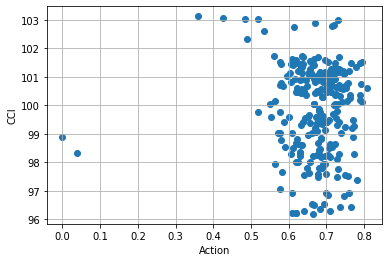

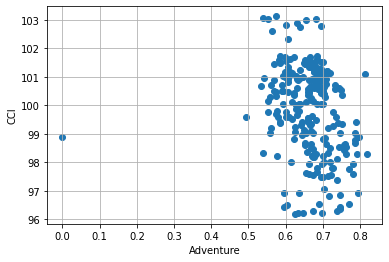

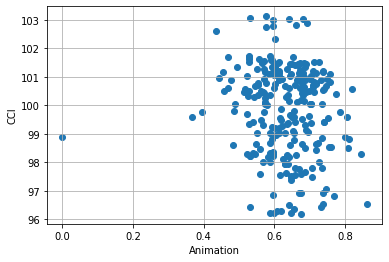

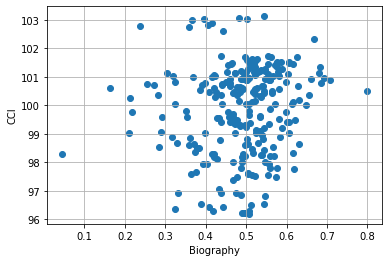

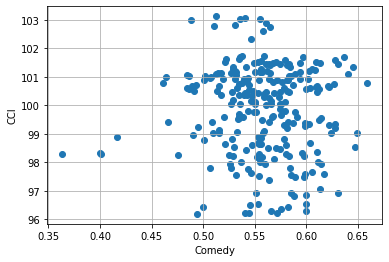

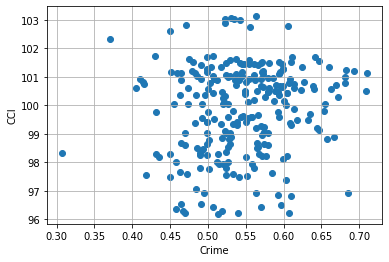

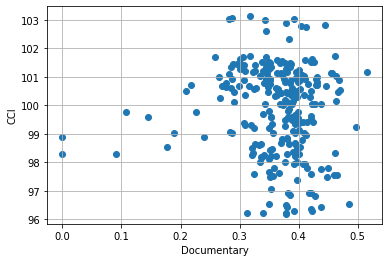

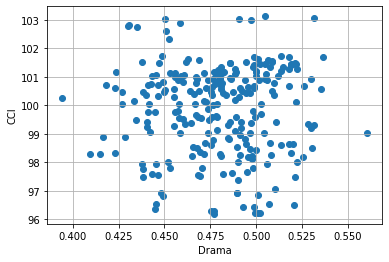

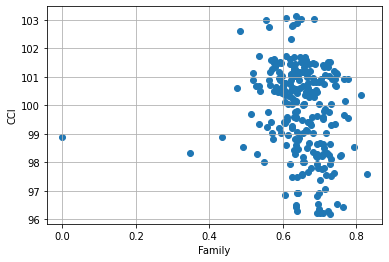

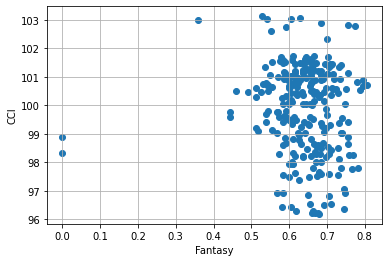

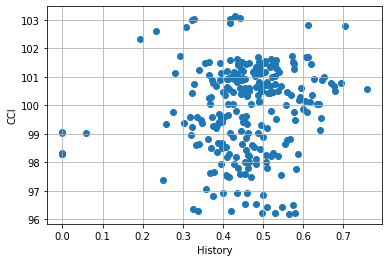

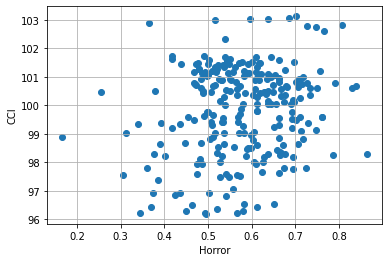

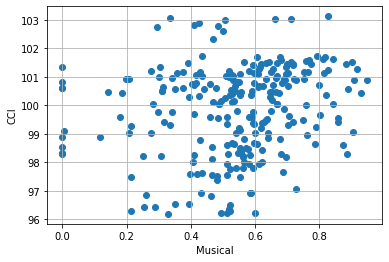

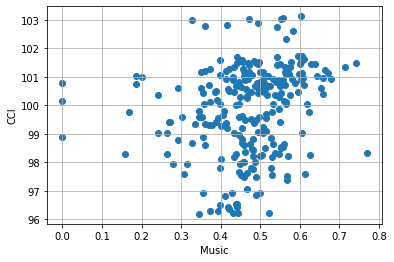

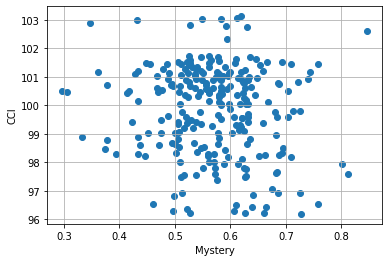

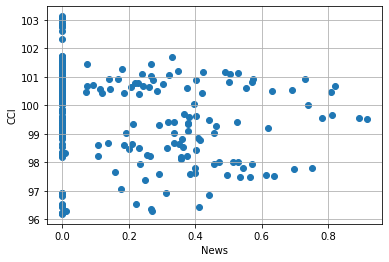

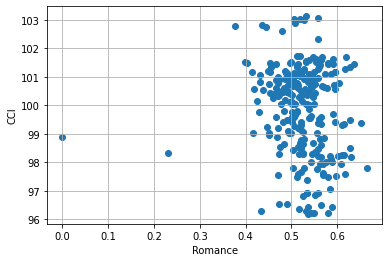

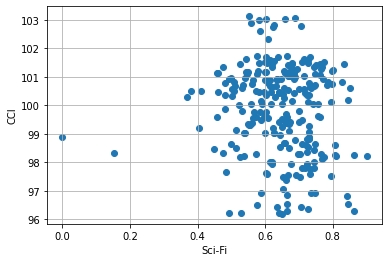

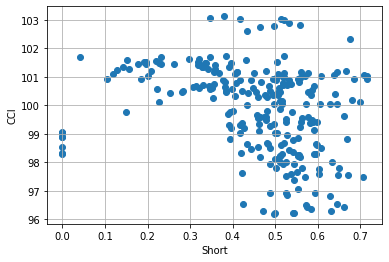

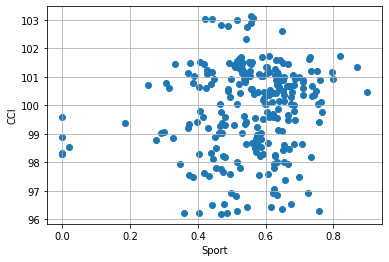

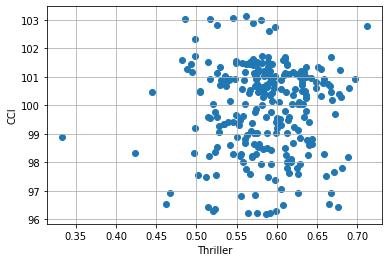

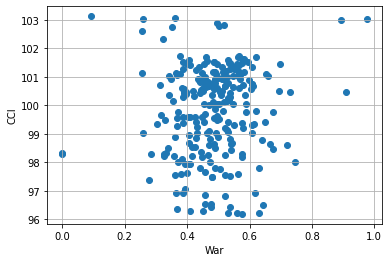

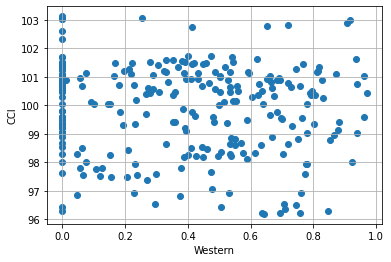

In [20]:
# FOR MONTHLY DATA

for column in monthly_genre_df.columns[3:]:
    fig, axs = plt.subplots()
    axs.scatter(monthly_genre_df[column],monthly_genre_df['CCI'])
    axs.set_xlabel(column)
    axs.set_ylabel('CCI')
    axs.grid(True)
    #plt.savefig('cci_plots/monthly/month_'+ column +'.png')
    print(column)
    

Action
correlation=-0.215584, p-value=0.347968
Adventure
correlation=-0.385714, p-value=0.084188
Animation
correlation=-0.111688, p-value=0.629811
Biography
correlation=0.207792, p-value=0.366082
Comedy
correlation=0.253247, p-value=0.268018
Crime
correlation=0.110390, p-value=0.633823
Documentary
correlation=-0.136364, p-value=0.555595
Drama
correlation=0.032478, p-value=0.888853
Family
correlation=-0.184416, p-value=0.423566
Fantasy
correlation=-0.338961, p-value=0.132811
History
correlation=-0.220779, p-value=0.336188
Horror
correlation=0.154545, p-value=0.503568
Musical
correlation=0.233766, p-value=0.307788
Music
correlation=0.446753, p-value=0.042324
Mystery
correlation=-0.067532, p-value=0.771162
News
correlation=-0.355360, p-value=0.113911
Romance
correlation=-0.340260, p-value=0.131238
Sci-Fi
correlation=-0.176623, p-value=0.443748
Short
correlation=-0.640260, p-value=0.001770
Sport
correlation=0.018182, p-value=0.937650
Thriller
correlation=0.053247, p-value=0.818692
War
corr

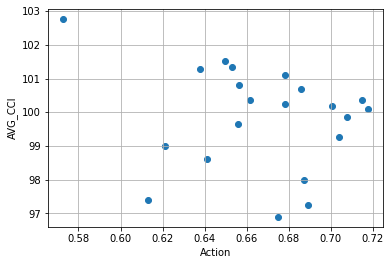

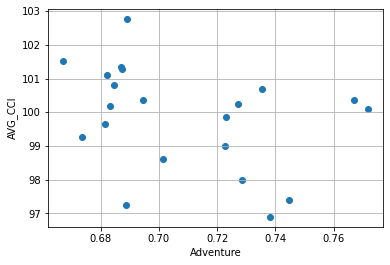

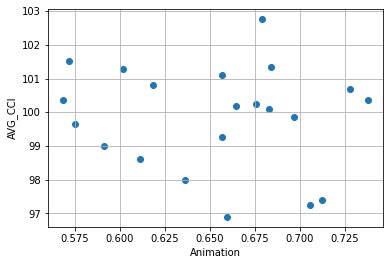

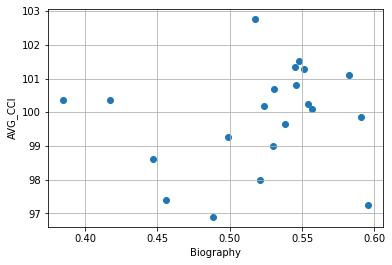

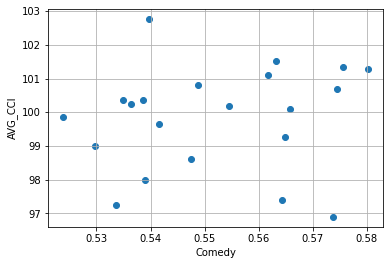

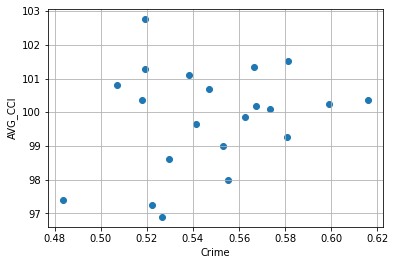

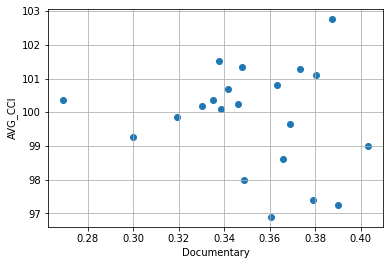

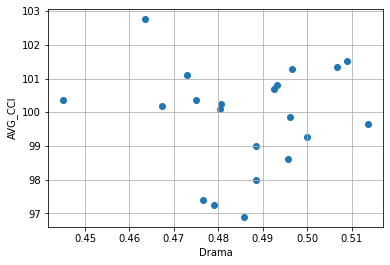

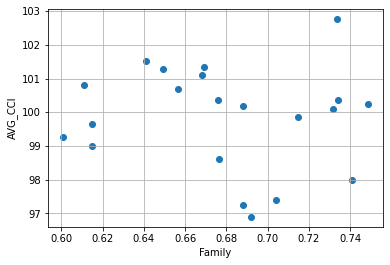

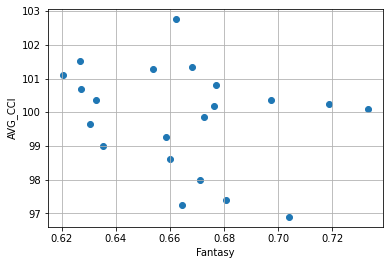

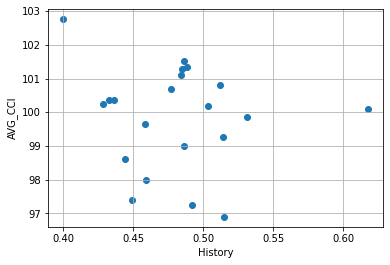

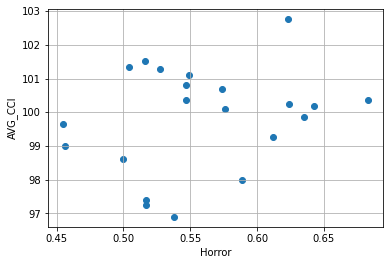

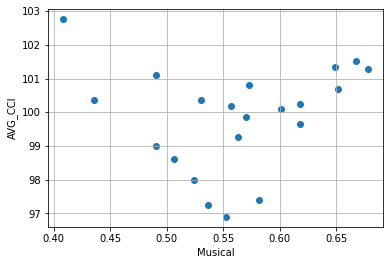

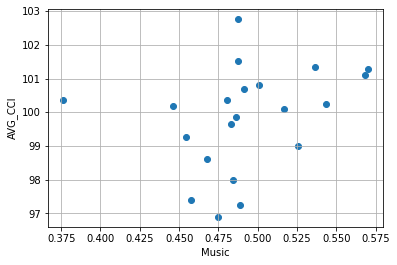

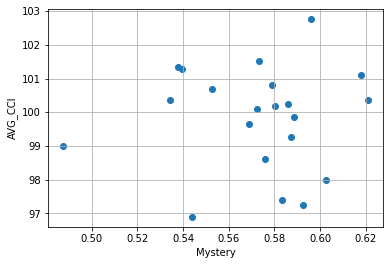

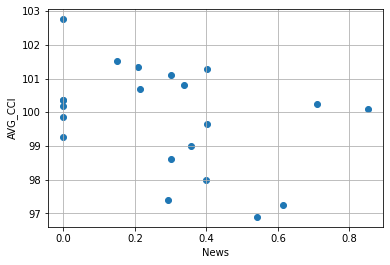

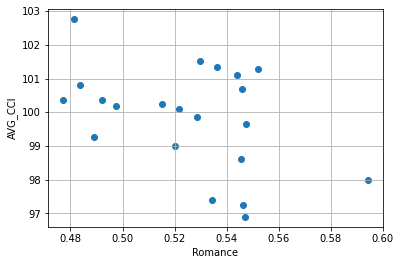

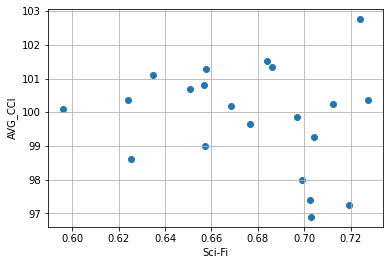

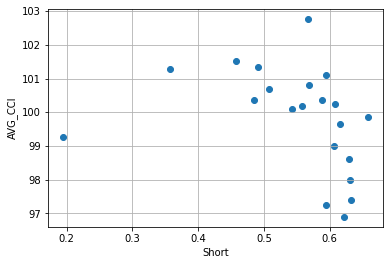

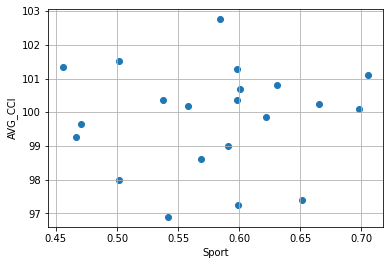

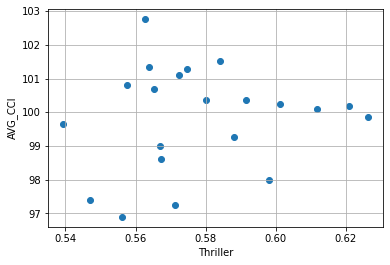

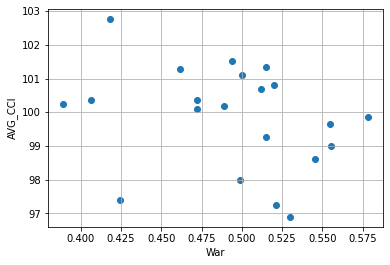

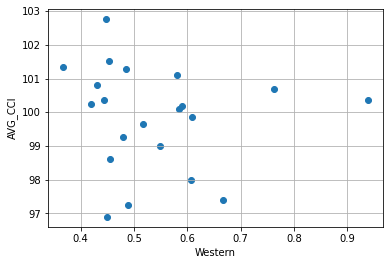

In [23]:
# FOR YEARLY DATA

for column in yearly_genre_df.columns[2:]:
    fig, axs = plt.subplots()
    axs.scatter(yearly_genre_df[column],yearly_genre_df['AVG_CCI'])
    axs.set_xlabel(column)
    axs.set_ylabel('AVG_CCI')
    axs.grid(True)
    #plt.savefig('cci_plots/yearly/year_'+ column +'.png')
    print(column)
    correlation, pval = spearmanr(yearly_genre_df[['AVG_CCI', column]])
    print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
    

In [27]:
yearly_genres_race_df = pd.read_csv('yearly_genres_race.csv')
yearly_genres_race_df

,Year,Race Relations Dissatisfaction,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2001,0.48,0.66152,0.69460,0.56878,0.38499,0.53490,0.61576,0.26937,0.44513,...,0.48063,0.53426,0.00000,0.47725,0.62405,0.48534,0.53805,0.59148,0.40652,0.44310
1,2002,0.41,0.71469,0.76687,0.73750,0.41754,0.53866,0.51806,0.33497,0.47492,...,0.37635,0.62076,0.00000,0.49212,0.72735,0.58868,0.59815,0.58006,0.47188,0.93860
2,2003,0.44,0.70049,0.68340,0.66429,0.52344,0.55445,0.56720,0.33042,0.46726,...,0.44618,0.58024,0.00000,0.49753,0.66853,0.55813,0.55854,0.62095,0.48912,0.58996
3,2004,0.40,0.67842,0.68211,0.65671,0.58218,0.56164,0.53809,0.38022,0.47294,...,0.56836,0.61772,0.30143,0.54401,0.63490,0.59472,0.70532,0.57250,0.50029,0.58143
4,2005,0.37,0.67820,0.72708,0.67571,0.55431,0.53633,0.59915,0.34593,0.48061,...,0.54373,0.58574,0.70858,0.51514,0.71219,0.60811,0.66546,0.60113,0.38909,0.41982
5,2006,0.40,0.71759,0.77164,0.68282,0.55658,0.56573,0.57339,0.33841,0.48050,...,0.51671,0.57252,0.85121,0.52171,0.59621,0.54352,0.69781,0.61190,0.47231,0.58395
6,2007,0.42,0.70777,0.72292,0.69646,0.59092,0.52388,0.56242,0.31934,0.49605,...,0.48619,0.58847,0.00000,0.52860,0.69685,0.65795,0.62224,0.62626,0.57820,0.60903
7,2008,0.40,0.67509,0.73826,0.65927,0.48860,0.57366,0.52642,0.36039,0.48585,...,0.47498,0.54391,0.54069,0.54697,0.70283,0.62262,0.54147,0.55627,0.53024,0.44985
8,2012,0.40,0.64095,0.70131,0.61114,0.44681,0.54755,0.52966,0.36607,0.49561,...,0.46803,0.57568,0.30015,0.54550,0.62551,0.63011,0.56877,0.56728,0.54523,0.45532
9,2013,0.41,0.62095,0.72276,0.59110,0.53016,0.52967,0.55304,0.40306,0.48842,...,0.52579,0.48767,0.35721,0.51998,0.65736,0.60639,0.59130,0.56691,0.55557,0.54943


In [28]:
race_yearly_stats_df = pd.DataFrame(columns=['Genre','Correlation_Coefficient','P-Value'])

Action
correlation=-0.189247, p-value=0.466940
Adventure
correlation=-0.285727, p-value=0.266256
Animation
correlation=0.029686, p-value=0.909952
Biography
correlation=-0.023501, p-value=0.928661
Comedy
correlation=0.456420, p-value=0.065536
Crime
correlation=0.063082, p-value=0.809925
Documentary
correlation=-0.260988, p-value=0.311637
Drama
correlation=0.299333, p-value=0.243138
Family
correlation=-0.399522, p-value=0.112106
Fantasy
correlation=-0.279542, p-value=0.277197
History
correlation=0.196669, p-value=0.449315
Horror
correlation=-0.018554, p-value=0.943655
Musical
correlation=0.421787, p-value=0.091727
Music
correlation=0.115033, p-value=0.660205
Mystery
correlation=-0.270884, p-value=0.292967
News
correlation=-0.455857, p-value=0.065912
Romance
correlation=-0.110085, p-value=0.674046
Sci-Fi
correlation=-0.012369, p-value=0.962421
Short
correlation=-0.731015, p-value=0.000857
Sport
correlation=-0.296859, p-value=0.247244
Thriller
correlation=-0.004948, p-value=0.984964
War
co

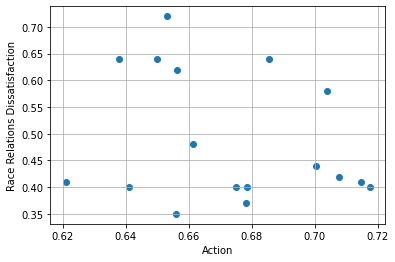

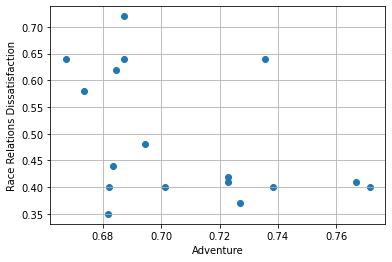

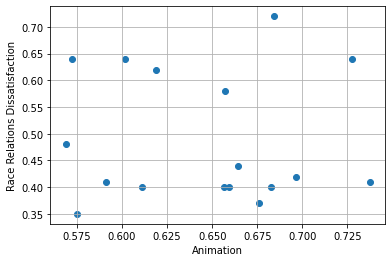

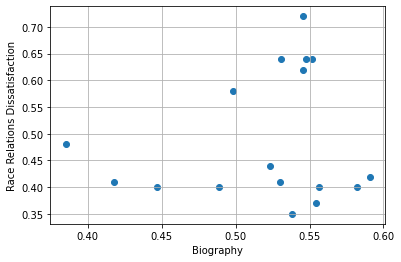

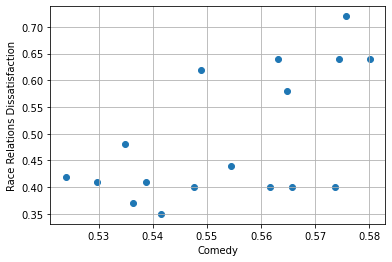

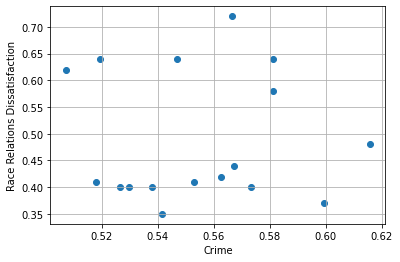

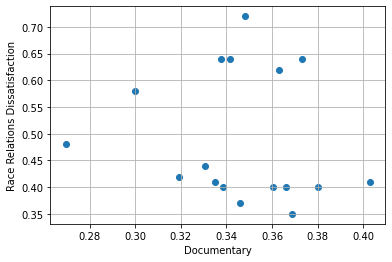

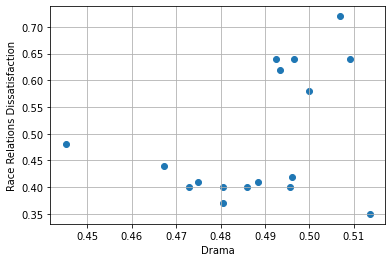

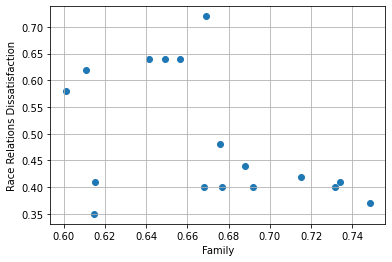

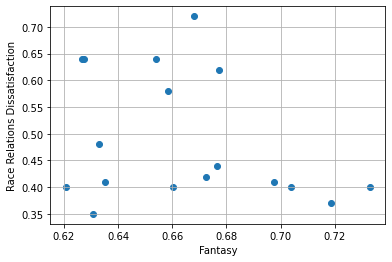

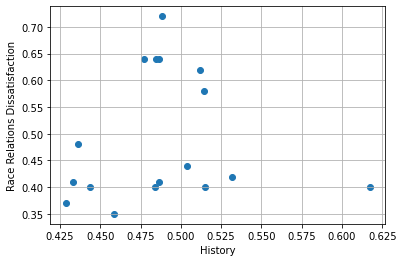

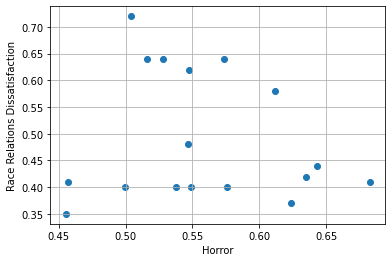

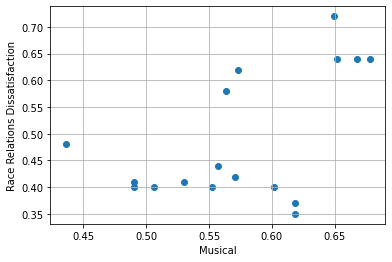

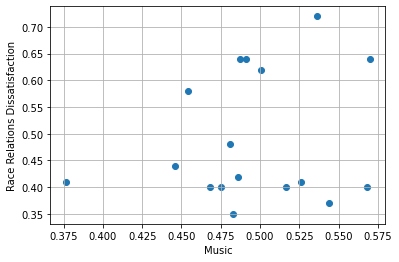

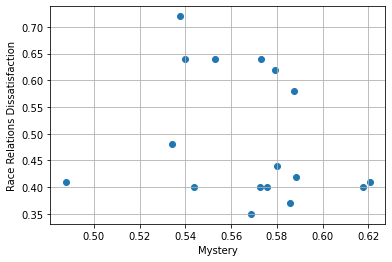

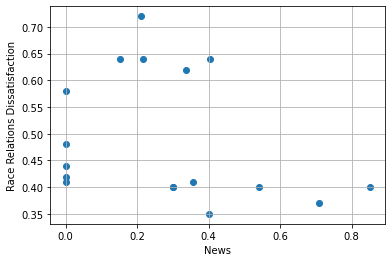

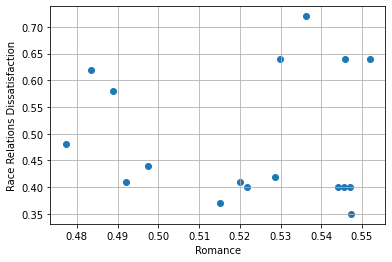

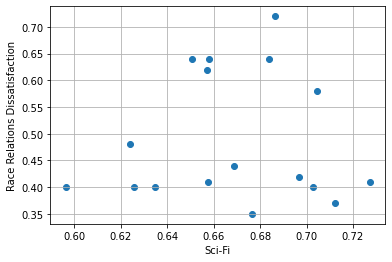

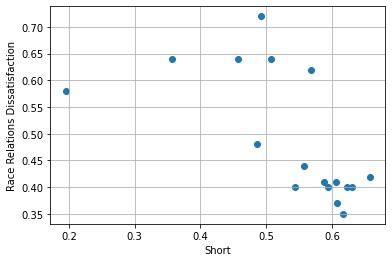

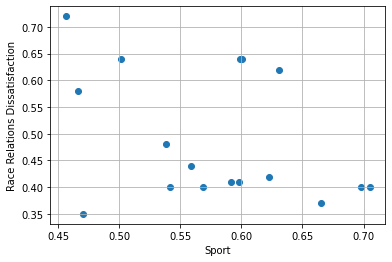

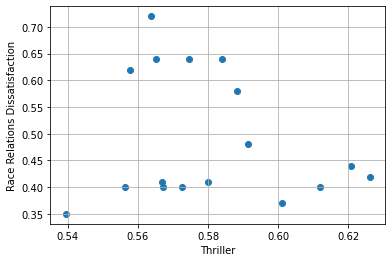

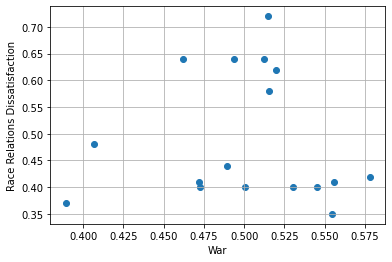

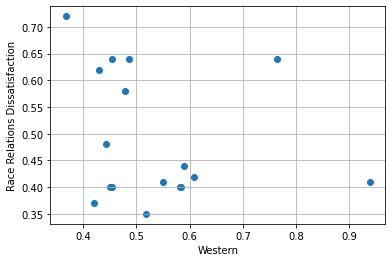

In [31]:
for column in yearly_genres_race_df.columns[2:]:
    fig, axs = plt.subplots()
    axs.scatter(yearly_genres_race_df[column],yearly_genres_race_df['Race Relations Dissatisfaction'])
    axs.set_xlabel(column)
    axs.set_ylabel('Race Relations Dissatisfaction')
    axs.grid(True)
    #plt.savefig('race_relation_plots/race_year_'+ column +'.png')
    print(column)
    correlation, pval = spearmanr(yearly_genres_race_df[['Race Relations Dissatisfaction', column]])
    race_yearly_stats_df.loc[len(race_yearly_stats_df)] = [column,correlation,pval]
    print(f'correlation={correlation:.6f}, p-value={pval:.6f}')


In [34]:
race_yearly_stats_df
race_yearly_stats_df.to_csv('race_yearly_stats_df.csv')